In [ ]:

# 3) Configure l'environnement
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# 4) Télécharge et décompresse le dataset
!kaggle datasets download -d yukundiao/tinyimagenet -p /content/tinyimagenet --unzip

# 5) Vérifie la structure des fichiers
!find /content/tinyimagenet -maxdepth 2 | head -n 20

Dataset URL: https://www.kaggle.com/datasets/yukundiao/tinyimagenet
License(s): unknown
 99% 232M/235M [00:00<00:00, 799MB/s] 
100% 235M/235M [00:00<00:00, 827MB/s]
/content/tinyimagenet
/content/tinyimagenet/tiny-imagenet-200
/content/tinyimagenet/tiny-imagenet-200/words.txt
/content/tinyimagenet/tiny-imagenet-200/test
/content/tinyimagenet/tiny-imagenet-200/train
/content/tinyimagenet/tiny-imagenet-200/wnids.txt
/content/tinyimagenet/tiny-imagenet-200/val


In [ ]:
import os
import shutil

val_dir = '/content/tinyimagenet/tiny-imagenet-200/val'
images_dir = os.path.join(val_dir, 'images')
annotations_file = os.path.join(val_dir, 'val_annotations.txt')

# Crée les dossiers par classe
with open(annotations_file, 'r') as f:
    for line in f:
        img, class_id = line.strip().split('\t')[:2]
        class_dir = os.path.join(val_dir, class_id)
        os.makedirs(class_dir, exist_ok=True)
        src = os.path.join(images_dir, img)
        dst = os.path.join(class_dir, img)
        shutil.move(src, dst)

# Supprime le dossier images
shutil.rmtree(images_dir)


Epoch 1/10


Training       : 100%|██████████| 1563/1563 [01:18<00:00, 19.83it/s]


Train Loss     : 9.9578
Train Accuracy : 2.96%


Testing        : 100%|██████████| 157/157 [00:07<00:00, 21.68it/s]


Test Loss      : 4.7670
Test Accuracy  : 4.87%
✅ Nouveau meilleur modèle sauvegardé

Epoch 2/10


Training       : 100%|██████████| 1563/1563 [01:18<00:00, 19.90it/s]


Train Loss     : 9.1252
Train Accuracy : 6.38%


Testing        : 100%|██████████| 157/157 [00:05<00:00, 27.51it/s]


Test Loss      : 4.4965
Test Accuracy  : 7.97%
✅ Nouveau meilleur modèle sauvegardé

Epoch 3/10


Training       : 100%|██████████| 1563/1563 [01:18<00:00, 19.93it/s]


Train Loss     : 7.7275
Train Accuracy : 8.99%


Testing        : 100%|██████████| 157/157 [00:05<00:00, 31.06it/s]


Test Loss      : 4.3467
Test Accuracy  : 10.07%
✅ Nouveau meilleur modèle sauvegardé

Epoch 4/10


Training       : 100%|██████████| 1563/1563 [01:18<00:00, 20.03it/s]


Train Loss     : 6.5084
Train Accuracy : 10.96%


Testing        : 100%|██████████| 157/157 [00:04<00:00, 33.19it/s]


Test Loss      : 4.2192
Test Accuracy  : 11.44%
✅ Nouveau meilleur modèle sauvegardé

Epoch 5/10


Training       : 100%|██████████| 1563/1563 [01:18<00:00, 19.95it/s]


Train Loss     : 5.5465
Train Accuracy : 12.27%


Testing        : 100%|██████████| 157/157 [00:04<00:00, 33.78it/s]


Test Loss      : 4.1343
Test Accuracy  : 12.30%
✅ Nouveau meilleur modèle sauvegardé

Epoch 6/10


Training       : 100%|██████████| 1563/1563 [01:18<00:00, 20.01it/s]


Train Loss     : 4.8888
Train Accuracy : 13.41%


Testing        : 100%|██████████| 157/157 [00:05<00:00, 27.92it/s]


Test Loss      : 4.0528
Test Accuracy  : 13.50%
✅ Nouveau meilleur modèle sauvegardé

Epoch 7/10


Training       : 100%|██████████| 1563/1563 [01:18<00:00, 19.96it/s]


Train Loss     : 4.4822
Train Accuracy : 14.62%


Testing        : 100%|██████████| 157/157 [00:05<00:00, 26.52it/s]


Test Loss      : 3.9852
Test Accuracy  : 14.25%
✅ Nouveau meilleur modèle sauvegardé

Epoch 8/10


Training       : 100%|██████████| 1563/1563 [01:19<00:00, 19.59it/s]


Train Loss     : 4.1852
Train Accuracy : 15.54%


Testing        : 100%|██████████| 157/157 [00:05<00:00, 27.46it/s]


Test Loss      : 3.9364
Test Accuracy  : 15.45%
✅ Nouveau meilleur modèle sauvegardé

Epoch 9/10


Training       : 100%|██████████| 1563/1563 [01:17<00:00, 20.11it/s]


Train Loss     : 4.0522
Train Accuracy : 16.34%


Testing        : 100%|██████████| 157/157 [00:05<00:00, 28.02it/s]


Test Loss      : 3.8902
Test Accuracy  : 16.60%
✅ Nouveau meilleur modèle sauvegardé

Epoch 10/10


Training       : 100%|██████████| 1563/1563 [01:18<00:00, 19.99it/s]


Train Loss     : 3.9659
Train Accuracy : 17.22%


Testing        : 100%|██████████| 157/157 [00:04<00:00, 33.71it/s]


Test Loss      : 3.8480
Test Accuracy  : 16.94%
✅ Nouveau meilleur modèle sauvegardé
Best Test Accuracy: 16.94%


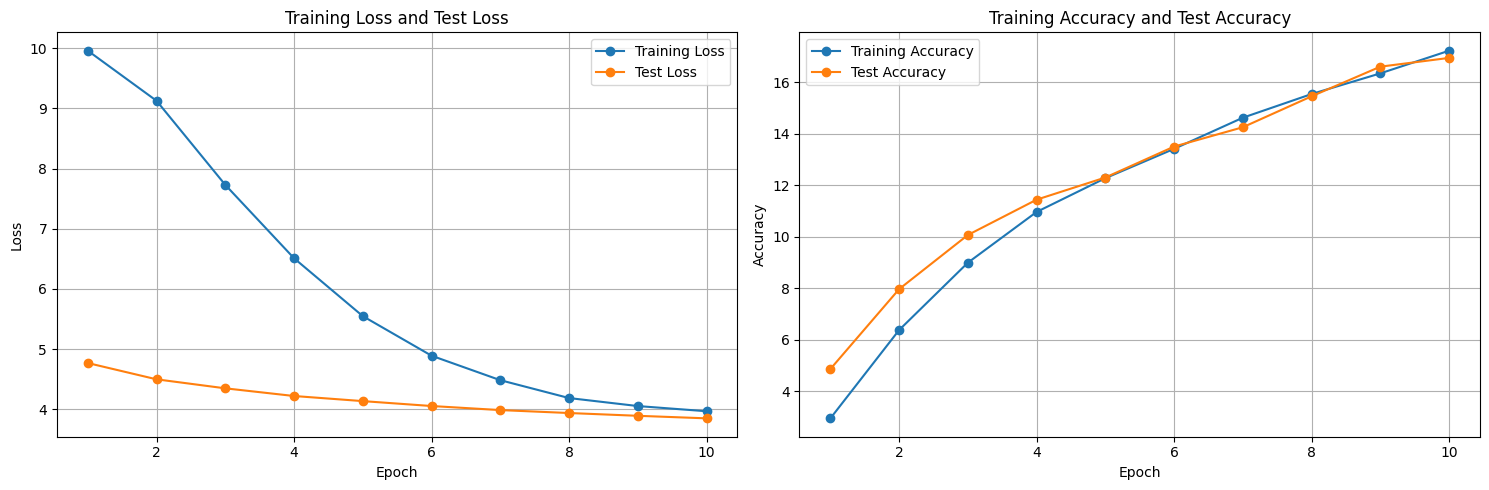

Model saved
Done


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from torch.utils.data import DataLoader
from tqdm import tqdm
from collections import defaultdict
import matplotlib.pyplot as plt
import os
from torchvision.datasets import ImageFolder

# === Configuration ===
img_size = 64
n_channels = 3
patch_size = 16
d_model = 128
num_heads = 4
num_layers = 6
num_classes = 200
ff_dim = 384
dropout = 0.1
lr = 1e-4
batch_size = 32
num_epochs = 10           # Nombre d'époques
num_class_images = 200
warmup_ica_epoch =3
##########################################
# Patch Embedding
##########################################

class PatchEmbedding(nn.Module):
    def __init__(self, img_size, patch_size, d_model, in_chans=3):
        super().__init__()
        self.proj = nn.Conv2d(in_chans, d_model, kernel_size=patch_size, stride=patch_size)
        self.norm = nn.LayerNorm(d_model)

    def forward(self, x):
        x = self.proj(x)
        x = x.flatten(2).transpose(1, 2)
        return x

##########################################
# ICA avec α progressif
##########################################
class IntraClassAttention(nn.Module):
    def __init__(self, dmodel=768, nheads=16, dropout=0.1):
        super().__init__()
        self.attn = nn.MultiheadAttention(dmodel, nheads, batch_first=True)
        self.proto_norm = nn.LayerNorm(d_model)
        self.dropout = nn.Dropout(dropout)

        self.alpha = nn.Parameter(torch.tensor(-4.0))  # sigmoid(-4) ≈ 0.018

    def forward(self, cls_token, proto_features, epoch, warmup_epoch):
        warm_alpha = min(1.0, epoch / (warmup_epoch * 3))  # monte sur ~9 epochs
        #warm_alpha = 1.0
        alpha_scaled = torch.sigmoid(self.alpha) * warm_alpha

        cls_expanded = cls_token.unsqueeze(1)
        attn_out, _ = self.attn(cls_expanded, proto_features, proto_features)
        mix = cls_token + alpha_scaled * self.dropout(attn_out.squeeze(1))
        return mix

##########################################
# ViT avec ICA
##########################################
class ViT_ICA(nn.Module):
    def __init__(self, img_size, patch_size, d_model, num_heads, num_layers, num_classes, ff_dim, dropout):
        super().__init__()
        self.patch_embed = PatchEmbedding(img_size, patch_size, d_model)
        self.cls_token = nn.Parameter(torch.randn(1, 1, d_model))
        num_patches = (img_size // patch_size) ** 2
        self.pos_embed = nn.Parameter(torch.randn(1, num_patches + 1, d_model))

        encoder_layer = nn.TransformerEncoderLayer(d_model, num_heads, ff_dim, dropout, batch_first=True)
        self.encoder = nn.TransformerEncoder(encoder_layer, num_layers)

        self.ica = IntraClassAttention(d_model, num_heads // 2  , dropout)
        self.fc = nn.Linear(d_model, num_classes)
        self.fc_combined = nn.Linear(d_model*2, num_classes)


    def forward(self, x, proto_features=None, use_ica=True, epoch=0, warmup_epoch=3):
        B = x.shape[0]
        x = self.patch_embed(x)
        cls_tokens = self.cls_token.expand(B, -1, -1)
        x = torch.cat((cls_tokens, x), dim=1)
        x = x + self.pos_embed
        x = self.encoder(x)
        cls_out = x[:, 0]

        if self.training and proto_features is not None:
            proto_out = self.ica(cls_out, proto_features, epoch, warmup_epoch)
            combined_out = torch.cat([cls_out, proto_out], dim=1)
            out_with_proto = self.fc_combined(combined_out)
            out_cls = self.fc(cls_out)
            #out = self.fc(proto_out) # Assuming 'out' is the output from proto_out

            return  out_with_proto, out_cls
        else:
            #print("proto_features mta3 test",proto_features)
            return self.fc(cls_out)

##########################################
# Data Loaders
##########################################
def get_data_loaders():
    #dataset_path = "/kaggle/input/tinyimagenet/TinyImageNet"
    dataset_path = "/content/tinyimagenet/tiny-imagenet-200"

    transform_train = transforms.Compose([
        transforms.Resize((64, 64)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.5]*3, [0.5]*3),
    ])

    transform_test = transforms.Compose([
        transforms.Resize((64, 64)),
        transforms.ToTensor(),
        transforms.Normalize([0.5]*3, [0.5]*3),
    ])

    train_dataset = ImageFolder(os.path.join(dataset_path, "train"), transform=transform_train)
    test_dataset = ImageFolder(os.path.join(dataset_path, "val"), transform=transform_test)
    class_images = defaultdict(list)
    for img, label in train_dataset:
        class_images[label].append(img)
    for label in class_images:
        class_images[label] = torch.stack(class_images[label])
    train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
    test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)
    return train_loader, test_loader, class_images

##########################################
# ICA Prototype Features Extractor
##########################################
def get_proto_features(model, class_images, device):
    model.eval()
    proto_bank = {}
    with torch.no_grad():
       for c, imgs in class_images.items():
            imgs = imgs.to(device)
            feats = model.patch_embed(imgs)
            cls_tok = model.cls_token.expand(imgs.size(0), -1, -1)
            x = torch.cat((cls_tok, feats), dim=1) + model.pos_embed
            enc = model.encoder(x)[:, 0]
            proto_bank[c] = enc.mean(dim=0, keepdim=True)
    return proto_bank

##########################################
# Train & Test
##########################################
def train_epoch(model, loader, optimizer, criterion, proto_bank, device, epoch):
    model.train()
    total_loss, correct, total = 0, 0, 0
    for images, labels in tqdm(loader, desc="Training       "):
    #for imgs, labels in tqdm(loader, desc=f"Train {epoch}"):
        images, labels = images.to(device), labels.to(device)
        proto_features = torch.stack([proto_bank[l.item()] for l in labels]).to(device)
        use_ica = epoch >= warmup_ica_epoch
        optimizer.zero_grad()

        out_with_proto, out_cls = model(images, proto_features, use_ica, epoch, warmup_ica_epoch)

        loss_proto = criterion(out_with_proto, labels)
        loss_cls = criterion(out_cls, labels)
        loss =  loss_cls +  loss_proto

        loss.backward()

        optimizer.step()
        total_loss += loss.item()
        correct += (out_cls.argmax(1) == labels).sum().item()
        total += labels.size(0)
    return total_loss / len(loader), 100 * correct / total


def test_epoch(model, loader, criterion, device):
    model.eval()
    total_loss, correct, total = 0, 0, 0
    with torch.no_grad():
        for images, labels in tqdm(loader, desc="Testing        "):
        #for imgs, labels in tqdm(loader, desc="Test"):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images, use_ica=False)  # ICA désactivée au test
            loss = criterion(outputs, labels)

            total_loss += loss.item()
            correct += (outputs.argmax(1) == labels).sum().item()
            total += labels.size(0)
    return total_loss / len(loader), 100 * correct / total

##########################################
# Main
##########################################
def main():
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    train_loader, test_loader, class_images = get_data_loaders()

    model = ViT_ICA(img_size, patch_size, d_model, num_heads, num_layers, num_classes, ff_dim, dropout).to(device)
    optimizer = optim.AdamW(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()



    t_train_acc = []
    t_test_acc = []
    t_train_loss = []
    t_test_loss = []
    best_acc = 0
    for epoch in range(num_epochs):
        proto_bank = get_proto_features(model, class_images, device)

        print(f'\nEpoch {epoch+1}/{num_epochs}')
        train_loss, train_acc = train_epoch(model, train_loader, optimizer, criterion, proto_bank, device, epoch)
        print(f'Train Loss     : {train_loss:.4f}')
        print(f'Train Accuracy : {train_acc:.2f}%')
        test_loss, test_acc = test_epoch(model, test_loader, criterion, device)
        print(f'Test Loss      : {test_loss:.4f}')
        print(f'Test Accuracy  : {test_acc:.2f}%')

        #print(f"Epoch {epoch+1}: Train Acc={train_acc:.2f}%, Test Acc={test_acc:.2f}%")

        if test_acc > best_acc:
            best_acc = test_acc
            torch.save(model.state_dict(), "best_vit_ica.pth")
            print("✅ Nouveau meilleur modèle sauvegardé")



        t_train_acc.append(train_acc)
        t_test_acc.append(test_acc)
        t_train_loss.append(train_loss)
        t_test_loss.append(test_loss)

    print(f"Best Test Accuracy: {best_acc:.2f}%")
    # Visualisation des pertes et des précisions
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))

    # Tracé de la perte
    ax[0].plot(range(1, num_epochs + 1), t_train_loss, label='Training Loss', marker='o')
    ax[0].plot(range(1, num_epochs + 1), t_test_loss, label='Test Loss', marker='o')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylabel('Loss')
    ax[0].set_title('Training Loss and Test Loss')
    ax[0].legend()
    ax[0].grid(True)

    # Tracé de la précision
    ax[1].plot(range(1, num_epochs + 1), t_train_acc, label='Training Accuracy', marker='o')
    ax[1].plot(range(1, num_epochs + 1), t_test_acc, label='Test Accuracy', marker='o')
    ax[1].set_xlabel('Epoch')
    ax[1].set_ylabel('Accuracy')
    ax[1].set_title('Training Accuracy and Test Accuracy')
    ax[1].legend()
    ax[1].grid(True)

    plt.tight_layout()
    plt.show()

    torch.save(model.state_dict(), 'model_state_dict.pth')
    torch.save(model, 'model.pth')
    print("Model saved")
    print("Done")


if __name__ == '__main__':
    main()